In [1]:
#### Importing the necessary libraries
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as st
from scipy import stats
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_curve 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms

#Importating files
billets = pd.read_csv('billets.csv', sep=';')

# Descriptive data analysis

In [2]:
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [3]:
billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [4]:
# is_genuine is boolean
# 37 null values margin_low
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [5]:
billets.nunique()

is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      285
margin_up       123
length          336
dtype: int64

In [6]:
billets_hna = billets[billets['margin_low'].isna()]
billets_hna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 72 to 1438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    37 non-null     bool   
 1   diagonal      37 non-null     float64
 2   height_left   37 non-null     float64
 3   height_right  37 non-null     float64
 4   margin_low    0 non-null      float64
 5   margin_up     37 non-null     float64
 6   length        37 non-null     float64
dtypes: bool(1), float64(6)
memory usage: 2.1 KB


Creating a table with the 37 "margin_low" null

In [7]:
billets_naf = billets.copy()
billets_naf = billets_naf.dropna()
billets_naf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


Creating a table without the 37 "margin_low" null

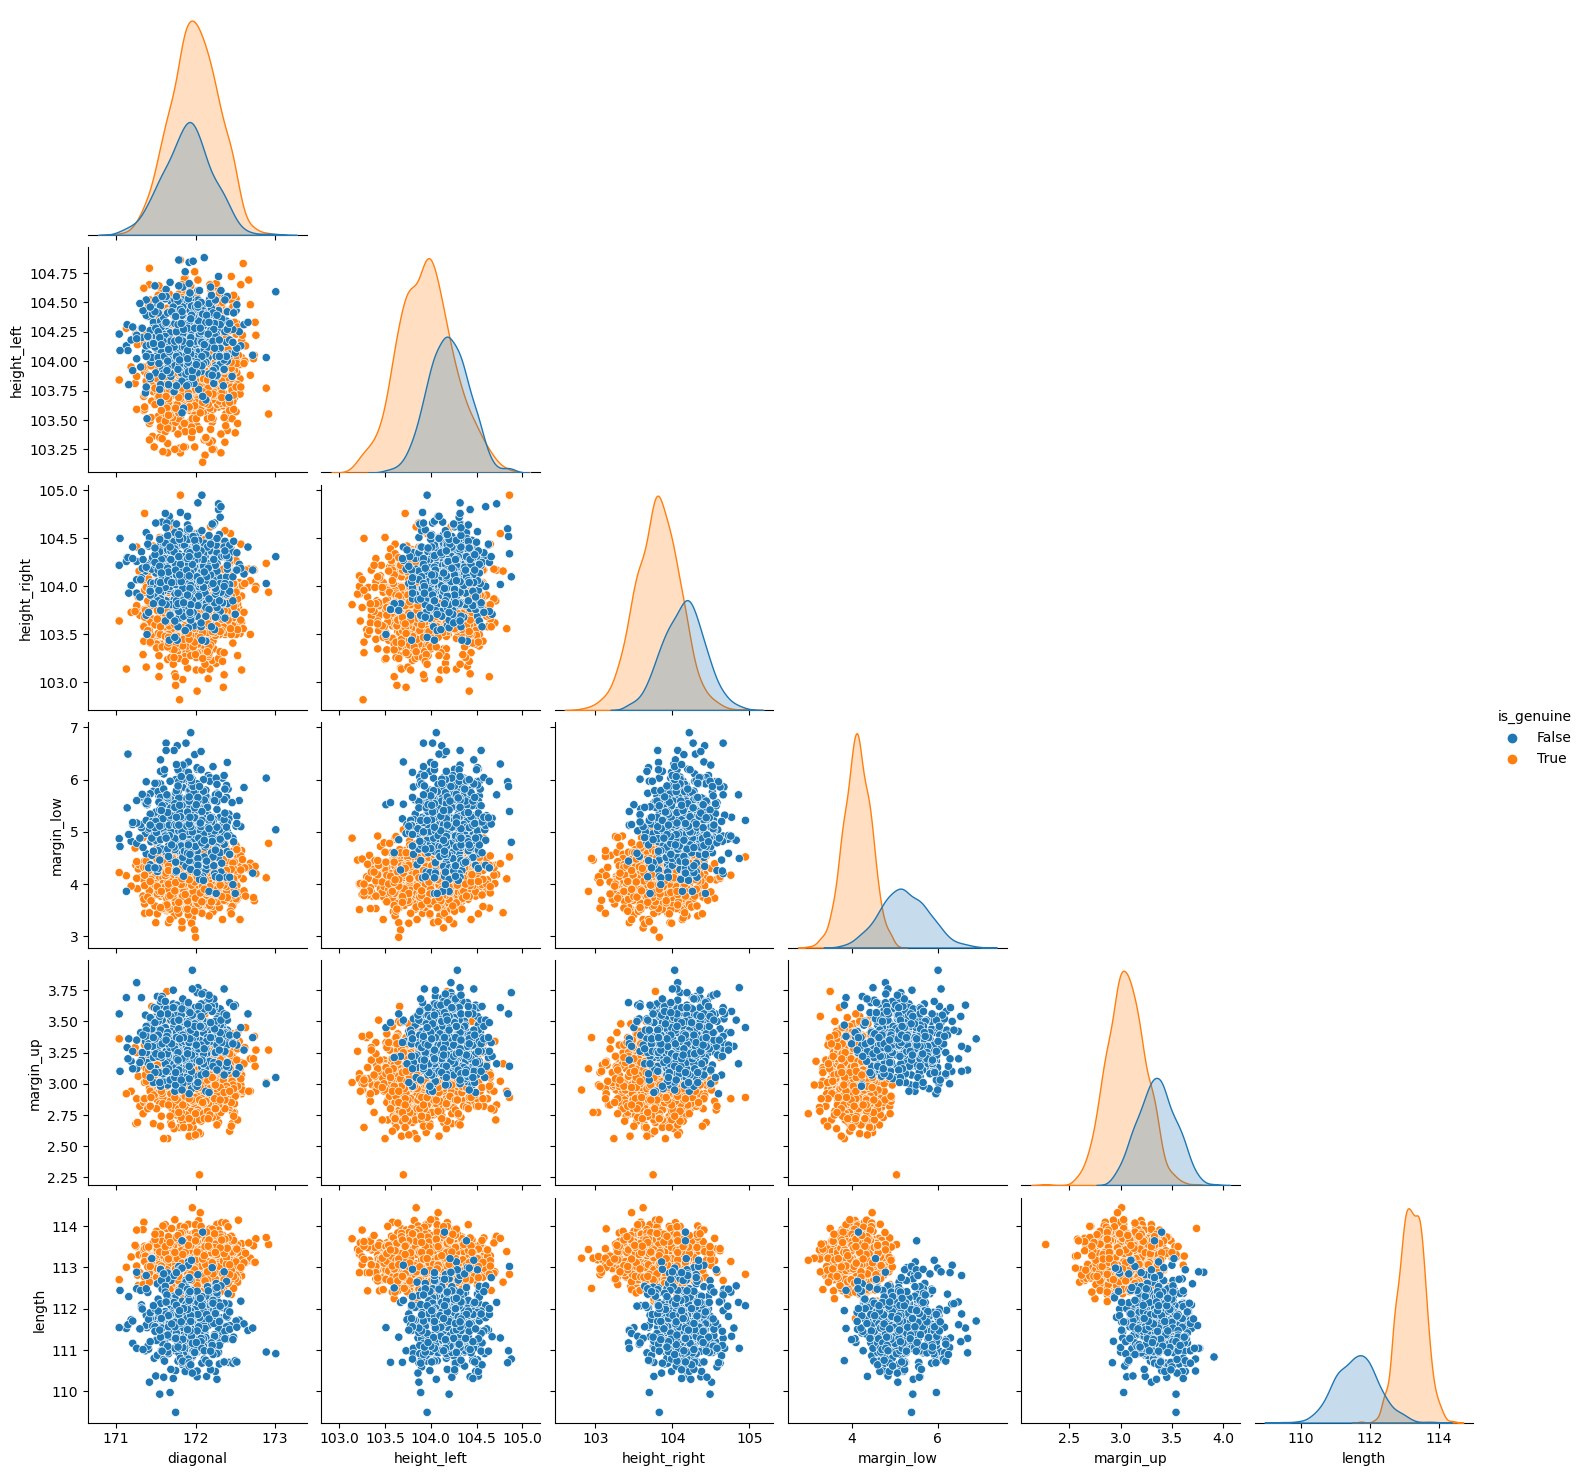

In [8]:
#Vue globale
sns.pairplot(billets,hue="is_genuine",corner=True)

The most deterministic variables are"margin_low" et "length"

([<matplotlib.patches.Wedge at 0x12f349b4c90>,
 [Text(-0.5500000594609755, 0.9526279098330699, 'True'),
  Text(0.5500001486524352, -0.9526278583383436, 'False')],
 [Text(-0.30000003243325934, 0.5196152235453108, '66.67%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.33%')])

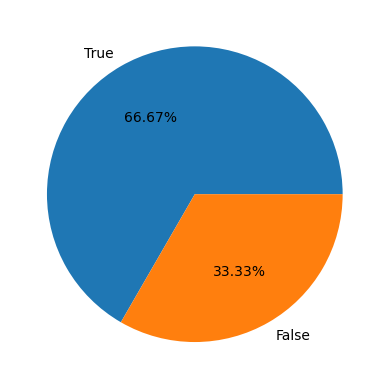

In [9]:
# Pieplot pour la répartion des valeurs vrai et fausse
camembert =plt.pie(x=billets['is_genuine'].value_counts(), labels=billets['is_genuine'].unique(), autopct='%.2f%%')
camembert

2/3 of the values are true 1/3 are false

### Correlation analysis

In [10]:
corr_m = billets.corr()
corr_m.style.background_gradient(cmap="coolwarm")

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.132756,-0.379833,-0.485092,-0.783032,-0.606262,0.849285
diagonal,0.132756,1.000000,0.019472,-0.024492,-0.111534,-0.055649,0.097587
height_left,-0.379833,0.019472,1.000000,0.242279,0.302643,0.246522,-0.320863
height_right,-0.485092,-0.024492,0.242279,1.000000,0.391085,0.307005,-0.401751
margin_low,-0.783032,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.606262,-0.055649,0.246522,0.307005,0.431606,1.000000,-0.520575
length,0.849285,0.097587,-0.320863,-0.401751,-0.666753,-0.520575,1.000000


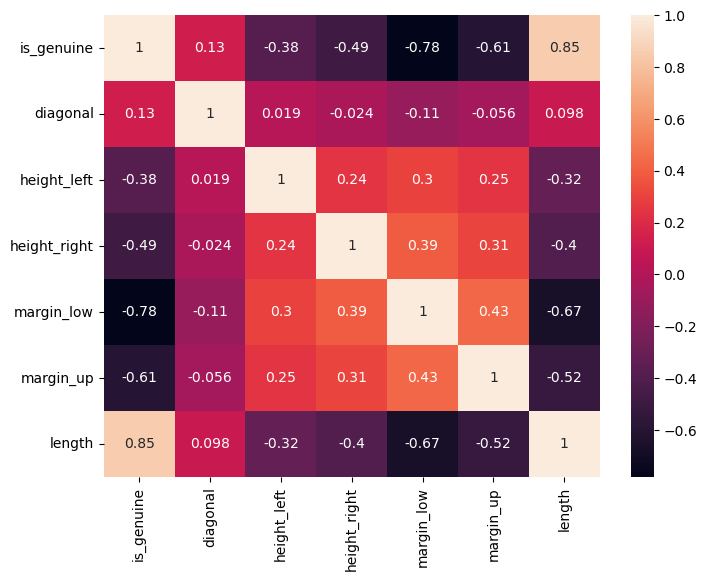

In [11]:
# Lenght et margin_low are highly correlated

plt.figure(figsize=(8, 6))
sns.heatmap(corr_m, annot=True)
plt.show()

### Distribution of variables based on True/False

<Axes: xlabel='is_genuine', ylabel='diagonal'>

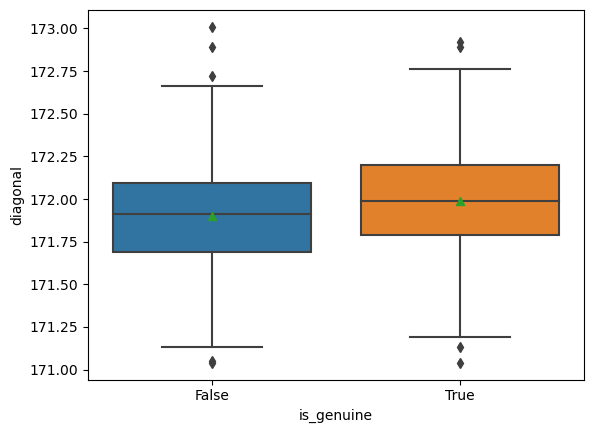

In [12]:
sns.boxplot(y=billets['diagonal'],x=billets['is_genuine'], showfliers=True, showmeans=True)

<Axes: xlabel='is_genuine', ylabel='length'>

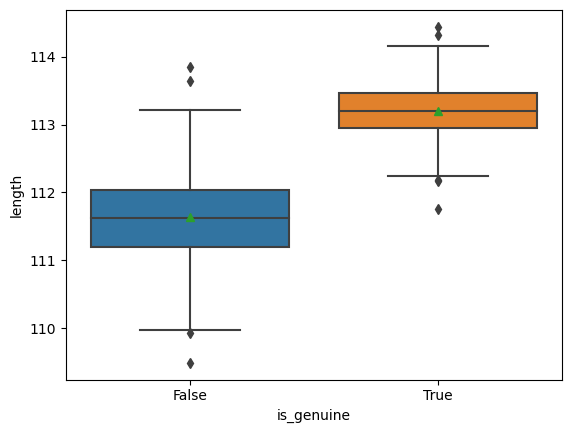

In [13]:
sns.boxplot(y=billets['length'],x=billets['is_genuine'], showfliers=True, showmeans=True)

<Axes: xlabel='is_genuine', ylabel='height_left'>

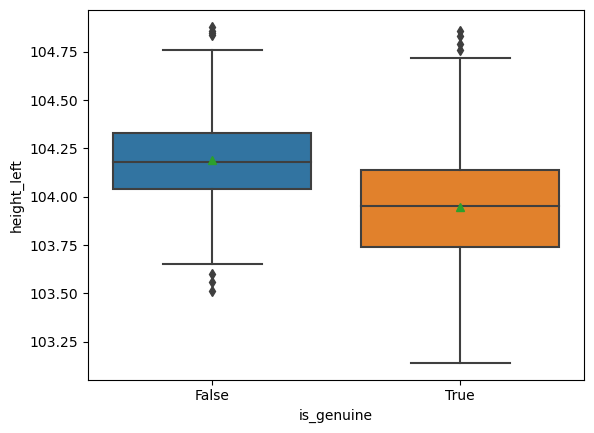

In [14]:
sns.boxplot(y=billets['height_left'],x=billets['is_genuine'], showfliers=True, showmeans=True)

<Axes: xlabel='is_genuine', ylabel='height_right'>

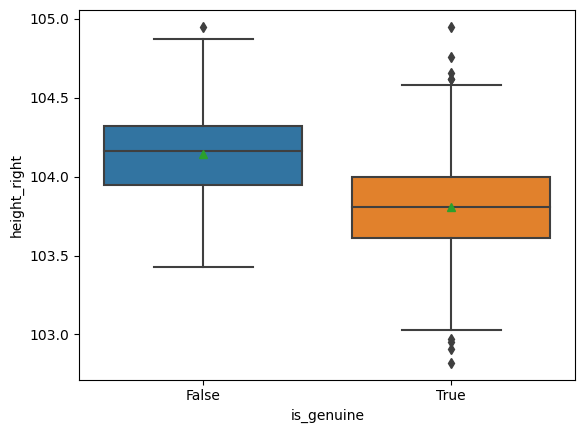

In [15]:
sns.boxplot(y=billets['height_right'],x=billets['is_genuine'], showfliers=True, showmeans=True)

<Axes: xlabel='is_genuine', ylabel='margin_low'>

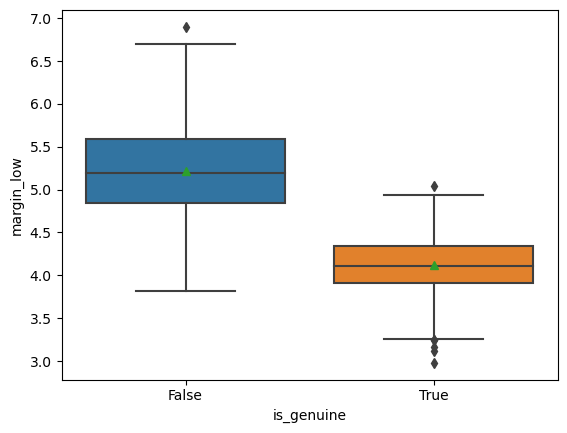

In [16]:
sns.boxplot(y=billets['margin_low'],x=billets['is_genuine'], showfliers=True, showmeans=True)

<Axes: xlabel='is_genuine', ylabel='margin_up'>

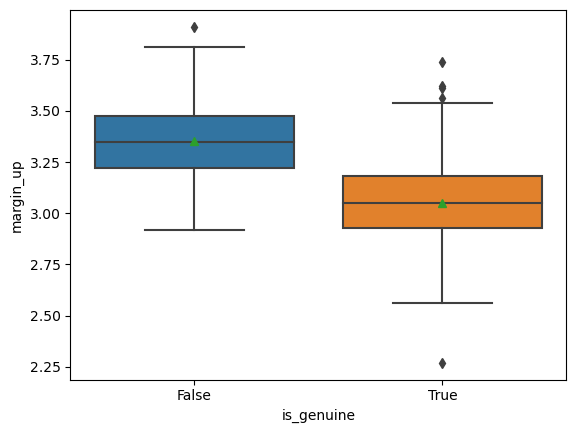

In [17]:
sns.boxplot(y=billets['margin_up'],x=billets['is_genuine'], showfliers=True, showmeans=True)

With the boxplots we reconfirm that "margin_low" and "length" are the variables with the most difference in their distribution

# Imputation of missing values by linear regression

Linear regression is the analysis and observation of the behavior of different variables. It is notably used to predict data and thus anticipate results.

We have 37 missing values ​​in our dataset that we would like to fill, here we could use multiple linear regression (it allows us to predict these values ​​by taking into account the different variables that influence it).

It is interesting to check certain key points before using it, in particular:
- Normality: The normal distribution of the residuals interests us for the margin of error in the case of multiple regression.
- Homodscedacity: If present, the error is distributed equally between variables, otherwise we speak of heteroscedacity.
- Multicollinearity: Variables with a high degree of correlation can compromise the reliability of the results to determine the most influential variables on the results.

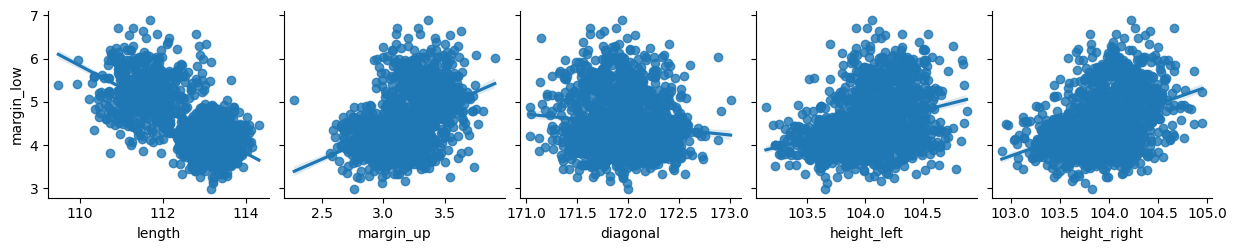

In [18]:
# Non-linear relationship data

sns.pairplot(billets,x_vars=['length','margin_up','diagonal','height_left','height_right'],y_vars='margin_low',kind='reg')

(array([ 13., 116., 415., 399., 183., 139., 111.,  62.,  18.,   7.]),
 array([2.98 , 3.372, 3.764, 4.156, 4.548, 4.94 , 5.332, 5.724, 6.116,
        6.508, 6.9  ]),
 <BarContainer object of 10 artists>)

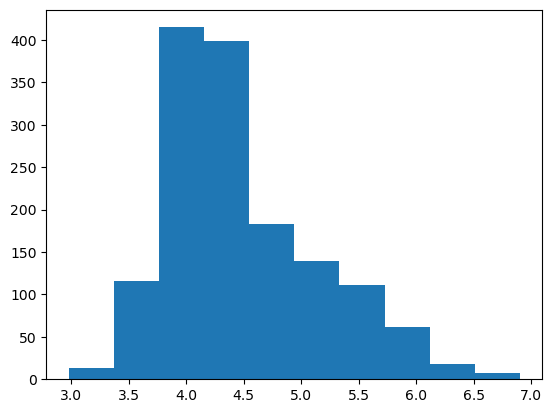

In [19]:
# Non-normal distribution

plt.hist(billets['margin_low'])

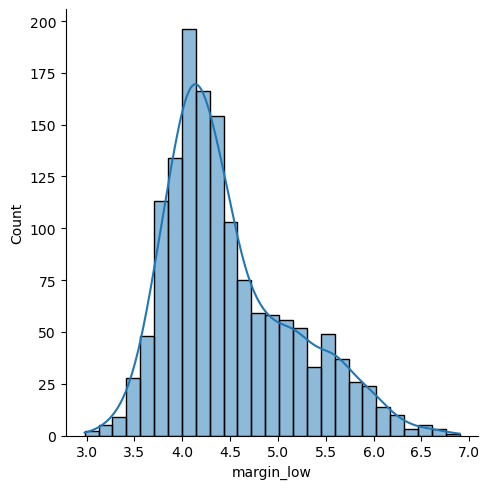

In [20]:
# Non-normal distribution
sns.displot(billets['margin_low'],kind='hist',kde=True)
plt.xlabel("margin_low")
plt.show()

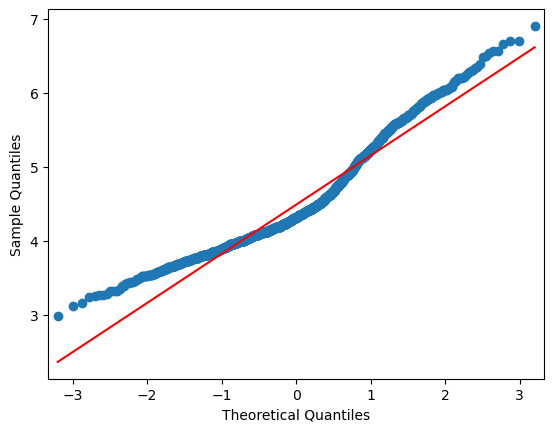

In [21]:
#create Q-Q plot 

figsq = sm.qqplot(billets_naf['margin_low'],line='s')
plt.show()

In [22]:
# Calculation of the "Variance Inflation Factor" for multicollinearity


#find design matrix for linear regression model using 'rating' as response variable 
r, O = dmatrices('margin_low ~ diagonal+height_left+height_right+margin_up+length', data=billets, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(O.values, i) for i in range(O.shape[1])]
vif['variable'] = O.columns
vif

,VIF,variable
0,590198.238883,Intercept
1,1.013613,diagonal
2,1.138261,height_left
3,1.230115,height_right
4,1.404404,margin_up
5,1.576950,length


Since the values are very close to 1, multicollinearity is not a problem.

In [23]:
# Variable used for prediction
X = billets_naf[['diagonal','height_left','height_right','margin_up','length']]

#Target variable
y = billets_naf.margin_low

In [24]:
# Multiple linear regression

X_sm = sm.add_constant(X)
w = billets_naf['margin_low']

method = sm.OLS(w, X_sm)
results = method.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          2.60e-202
Time:                        19:30:48   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.9948      9.656      2.382   

OLS (Ordinary Least Square): Allows to estimate the coefficients describing the relationships between several quantitative variables and an independent variable. The minimum square error.

BLUE (Best Linear Unbiased Estimator): The least square estimator is popular.

In [25]:
# Study

reg = LinearRegression()

# Variable used for prediction
X = billets_naf[['diagonal','height_left','height_right','margin_up','length']]

#Target variable
y = billets_naf.margin_low

#37 missing lines to be filled by linear regression
ks_test = billets_hna.copy()
ks_test = ks_test.drop(columns=['is_genuine','margin_low'])


# Test and training variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Training for prediction
reg.fit(X_train, y_train)

# Prediction on 20% of data with missing values
y_pred_test = reg.predict(X_test)

# Missing value prediction by linear regression
q_predict = reg.predict(ks_test)

In [26]:
# Perform the Goldfeld-Quandt test
gq_test = sm.stats.diagnostic.het_goldfeldquandt(w, X_sm, drop=0.2)

# Display the test results
print("Goldfeld-Quandt Test:")
print(f"Test statistic: {gq_test[0]}")
print(f"P-value: {gq_test[1]}")

# Interpret the results
if gq_test[1] > 0.05:
    print("The null hypothesis of homoscedasticity cannot be rejected.")
else:
    print("The null hypothesis of homoscedasticity is rejected, indicating heteroscedasticity.")

Goldfeld-Quandt Test:
Test statistic: 2.9222088905192796
P-value: 5.023355117591947e-32
The null hypothesis of homoscedasticity is rejected, indicating heteroscedasticity.


In [27]:
#perform Bresuch-Pagan test
namestest = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
testtes = sms.het_breuschpagan(results.resid, results.model.exog)

lzip(namestest, testtes)

[('Lagrange multiplier statistic', 80.16261280175267),
 ('p-value', 7.759535216187033e-16),
 ('f-value', 16.89235884615394),
 ('f p-value', 2.9227496566185574e-16)]

Hypothesis 0 is rejected, heteroscedacity is potentially present

<Axes: >

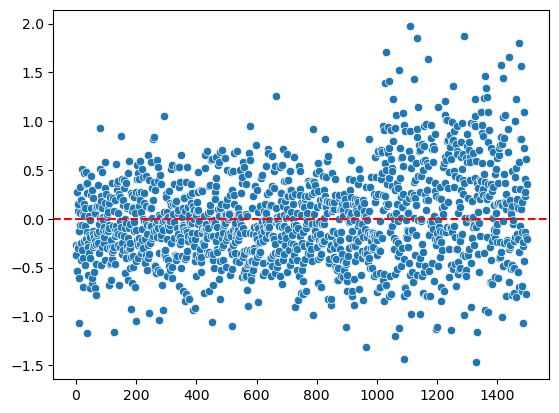

In [28]:
# The scatterplot of the residuals suggests the presence of heteroscedacy
plt.axhline(y=0,linestyle='--', color='r')
sns.scatterplot(results.resid)

In [29]:
# Normality of residuals rejected
resiro = stats.shapiro(results.resid)
print(resiro.statistic)
print(resiro.pvalue)

0.9857882857322693
8.540482210328548e-11


The p-value is less than 0.05, the assumption of normality is called into question.

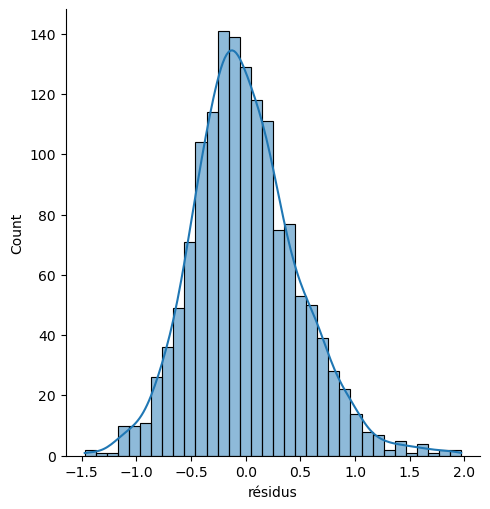

In [30]:
# The residual histogram shows a non-normal curve
sns.displot(results.resid,kind='hist',kde=True)
plt.xlabel("résidus")
plt.show()

The residuals probably do not follow a normal distribution (asymmetry)

In [31]:
# Value found on 20%
y_pred_test

array([4.95663909, 4.29838247, 4.37773033, 4.09528905, 4.02274623,
       4.09556812, 4.85333759, 4.12787564, 4.20096875, 3.86186446,
       5.14432738, 4.14823043, 4.44733479, 4.09221453, 5.90092241,
       4.11045697, 4.14332714, 3.95834732, 4.17074289, 5.09517943,
       4.23191991, 4.79131756, 4.99873123, 4.10663551, 4.07837551,
       4.00705317, 4.16650371, 4.10079816, 4.92034763, 4.23549692,
       5.09387072, 4.15454542, 4.49931861, 4.19683046, 3.99695363,
       4.19652204, 3.99281695, 5.58428831, 5.70103708, 4.14969001,
       4.26939031, 4.39374039, 4.78339619, 4.46593573, 5.34288044,
       4.41998605, 4.74133455, 4.94707235, 4.27139475, 4.71633351,
       4.28099917, 4.20833698, 3.94013334, 4.11720747, 4.33081046,
       4.20297806, 4.16353285, 4.38525544, 4.16643126, 5.36670059,
       3.84277709, 4.98740378, 4.05950115, 4.29212826, 4.5639465 ,
       4.26400103, 3.9062596 , 5.25679759, 5.22502646, 3.99322489,
       4.90731684, 4.37580735, 5.09590773, 4.25298309, 4.03710

In [32]:
# Missing value predicted by linear regression
q_predict

array([4.32313341, 4.39390672, 4.41684493, 4.33737433, 4.63461389,
       3.81522234, 4.19086236, 4.13398228, 4.15672544, 4.17913952,
       4.16884852, 3.77541749, 4.06368875, 4.30783541, 4.15292924,
       4.07386449, 4.43773031, 4.47423462, 4.3499566 , 4.09755029,
       3.6296821 , 4.36096656, 4.08864763, 4.23475852, 3.90342856,
       3.74232901, 4.24211109, 4.71129886, 4.1318945 , 5.02695835,
       4.77469718, 5.03732533, 5.01380628, 4.78146705, 5.69891334,
       5.19488577, 5.12109816])

In [33]:
# Reliable performance indicator
print(f"Intercept:{reg.intercept_}")
print(f"Coefficients: {reg.coef_}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_test)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_test)}")

Intercept:20.396009801378362
Coefficients: [-0.087151    0.15474474  0.25994669  0.29097436 -0.39898675]
RMSE: 0.1914495494749332
MAPE: 0.07467677345733445


RMSE: The root mean square error, between forecast and observed result

MAPE: The mean absolute scale error, between forecast and observed result

The closer these indicators are to zero, the better the performance

In [34]:
# The calculation of the residuals is done by the value of y minus the predicted values
oadslz = reg.predict(X)
residuals = y - oadslz
residuals

0      -0.233775
1      -0.372191
2       0.275760
3      -0.527045
4      -0.531056
          ...   
1495   -0.738593
1496   -0.164277
1497    0.614776
1498    0.361849
1499   -0.192696
Name: margin_low, Length: 1463, dtype: float64

In [35]:
# The 37 missing values obtained by linear regression joined to a matrix (rounded (2))

na_data = billets_hna.copy()
na_data['margin_low'] = q_predict.round(2)
na_data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.32,3.25,112.79
99,True,171.93,104.07,104.18,4.39,3.14,113.08
151,True,172.07,103.80,104.38,4.42,3.02,112.93
197,True,171.45,103.66,103.80,4.34,3.62,113.27
241,True,171.83,104.14,104.06,4.63,3.02,112.36
251,True,171.80,103.26,102.82,3.82,2.95,113.22
284,True,171.92,103.83,103.76,4.19,3.23,113.29
334,True,171.85,103.70,103.96,4.13,3.00,113.36
410,True,172.56,103.72,103.51,4.16,3.12,112.95
413,True,172.30,103.66,103.50,4.18,3.16,112.95


In [36]:
# Table billets with missing value imputed by merged linear regression

billets_regc = [billets_naf, na_data]
billets_f = pd.concat(billets_regc)
billets_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


# Prediction by logistic regression

La régression logistique est une méthode de classifiquation sur un modèle binomiale cherchant à expliquer les relations par des observations basé sur des fonctions mathématiques.

In [37]:
billets_f

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1303,False,172.17,104.49,103.76,5.01,2.93,111.21
1315,False,172.08,104.15,104.17,4.78,3.40,112.29
1347,False,171.72,104.46,104.12,5.70,3.61,110.31
1435,False,172.66,104.33,104.41,5.19,3.56,111.47


In [38]:
# Copy for calculation
log_bill = billets_f.copy()
log_bill

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1303,False,172.17,104.49,103.76,5.01,2.93,111.21
1315,False,172.08,104.15,104.17,4.78,3.40,112.29
1347,False,171.72,104.46,104.12,5.70,3.61,110.31
1435,False,172.66,104.33,104.41,5.19,3.56,111.47


In [39]:
# Binary conversion
log_bill['is_genuine'] = log_bill['is_genuine'].astype('category')

# Binary target variable 
u = log_bill['is_genuine'].cat.codes
b = u
b = b.to_numpy()

# Explanatory variables
s = log_bill.select_dtypes(np.number)
num_bill = log_bill.to_numpy()
A = num_bill[:,1:7]


In [40]:
# Logistic regression

clf = LogisticRegression(random_state=42)

In [41]:
# Test and training variables
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.20, random_state=42)
# We train
clf.fit(A_train, b_train)

LogisticRegression(random_state=42)

In [42]:
# Prediction result on all data
y_pred = clf.predict(A)
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int8)

In [43]:
# Prediction on 20% of data
m_pred=clf.predict(A_test)
# Probability prediction on 20% of the data
m_proba=clf.predict_proba(A_test)
# Generation of confusion matrix on prediction
confusion_matrix(b_test, m_pred)

array([[110,   1],
       [  3, 186]], dtype=int64)

In [44]:
#Confusion matrix with denominations
tn, fp, fn, tp = confusion_matrix(b_test, m_pred).ravel()

In [45]:
print("True negatif : ",tn,"False positif: ",fp,"False negatif: ",fn,"True positif: ", tp)

True negatif :  110 False positif:  1 False negatif:  3 True positif:  186


The confusion matrix highlights the 4 possible values:
- True positive: True positive value
- True negative: True negative value
- False positive: Value misinterpreted as positive
- False negative: Value misinterpreted as negative

It is more serious to have false negatives than false positives in a prediction model

In [46]:
# Accuracy score out of 20%
# Accuracy is the proportion of correct predictions over total predictions. 
accuracy_score(b_test, m_pred)

0.9866666666666667

In [47]:
# Confusion matrix on 20%
confusion_matrix(b_test, m_pred)

array([[110,   1],
       [  3, 186]], dtype=int64)

In [48]:
# Confusion matrix on all data
confusion_matrix(b, y_pred)

array([[491,   9],
       [  6, 994]], dtype=int64)

In [49]:
# Accuracy score on all data
accuracy_score(b, y_pred)

0.99

In [50]:
# Which corresponds to 187 true and 113 false
detailon = m_pred
detailon = pd.DataFrame(detailon,columns=['genuine'])
detailon.value_counts()

genuine
1          187
0          113
dtype: int64

In [51]:
# Categories predicted by the model

y_hat_proba = clf.predict_proba(A_test)[:,1]

In [52]:
# Some examples of the model
clf.predict_proba(A_test)[0, :]

array([0.99197642, 0.00802358])

In [53]:
clf.predict_proba(A_train)[0, :]

array([1.54801034e-04, 9.99845199e-01])

In [54]:
clf.predict_proba(A_test)[4, :]

array([0.01285188, 0.98714812])

In [55]:
# Probability of predicted values ​​(>0.5 = 1 & <0.5 = 0)

probabi = y_hat_proba
probabi = pd.DataFrame(probabi,columns=['proba'])
probabi

,proba
0,0.008024
1,0.209320
2,0.994192
3,0.974181
4,0.987148
...,...
295,0.000896
296,0.994424
297,0.000201
298,0.000060


In [56]:
# Considering several thresholds

y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba ]
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba ]

In [57]:
# Confusion matrix with threshold 0.3

confusion_matrix(b_test, y_pred_03)

array([[108,   3],
       [  1, 188]], dtype=int64)

In [58]:
# Accuracy score over 20%
# Precision: Precision measures the model's ability to correctly predict the positive class. It is calculated as TP / (TP + FP). 
# Precision is useful when the cost of false positives is high.
precision_score(b_test, m_pred)

0.9946524064171123

In [59]:
# Recall score
# The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives
# Recall quantifies the model's ability to correctly identify the positive class instances.
recall_score(b_test, m_pred)

0.9841269841269841

In [60]:
b_test

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1], d

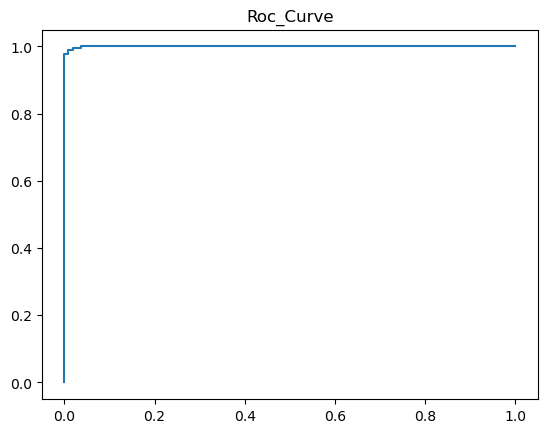

In [61]:
# Excellent performance
fpr, tpr, thresholds = roc_curve(b_test, y_hat_proba)

plt.title('Roc_Curve')
plt.plot(fpr, tpr)

The rock curve gives us the performance indicator of the model produced, the closer it is to 1 the better it is, the closer it is to 0.5 the less reliable it is

<Axes: ylabel='Count'>

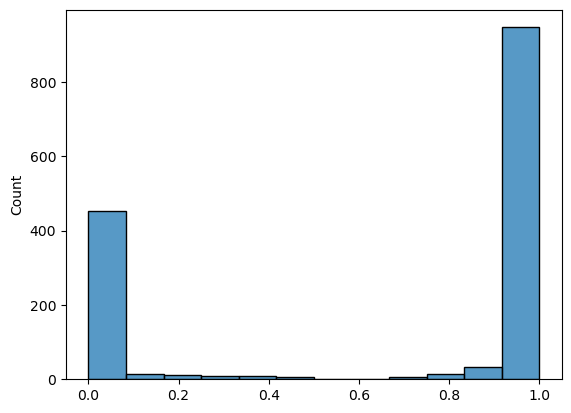

In [62]:
# Very close to reality

y_hat_proba = clf.predict_proba(A)[:,1]
sns.histplot(y_hat_proba)

This histplot informs us of the distribution of the resulting probabilities of our model, we want the maximum predicted value on 0 or 1, which is indeed the case here for a high-performance model.

In [63]:
# Logit Regression model

modele_logit = LogisticRegression(penalty='none',solver='newton-cg')
modele_logit.fit(A,b)
z_ppredict = modele_logit.predict(A_test)

print("Logistic Regression modele accuracy :",accuracy_score(b_test, z_ppredict)*100)
print("Logistic Regression modele precision :",precision_score(b_test, z_ppredict)*100)
print("Logistic Regression modele recall :",recall_score(b_test, z_ppredict)*100)
print(confusion_matrix(b_test,z_ppredict))

Logistic Regression modele accuracy : 99.0
Logistic Regression modele precision : 99.46808510638297
Logistic Regression modele recall : 98.94179894179894
[[110   1]
 [  2 187]]


C:\Users\fullb\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [64]:
# Logit Regression model with the whole data

rev_p = modele_logit.predict(A)

print("Logistic Regressiion modele accuracy :",accuracy_score(b, rev_p)*100)
print("Logistic Regression modele precision :",precision_score(b, rev_p)*100)
print("Logistic Regression modele recall :",recall_score(b, rev_p)*100)
print("confusion_matrix\n",confusion_matrix(b,rev_p ))

Logistic Regressiion modele accuracy : 99.13333333333333
Logistic Regression modele precision : 99.1044776119403
Logistic Regression modele recall : 99.6
confusion_matrix
 [[491   9]
 [  4 996]]


In [65]:
# Result on the whole data
z_pred_prob = modele_logit.predict_proba(A)[:, 1]
z_pred_prob

array([8.61433965e-01, 9.99994866e-01, 9.99652838e-01, ...,
       1.96084153e-11, 4.12761984e-07, 2.43099543e-05])

In [66]:
# With both proba
z_predd_prob = modele_logit.predict_proba(A)
z_predd_prob

array([[1.38566035e-01, 8.61433965e-01],
       [5.13367275e-06, 9.99994866e-01],
       [3.47162163e-04, 9.99652838e-01],
       ...,
       [1.00000000e+00, 1.96084153e-11],
       [9.99999587e-01, 4.12761984e-07],
       [9.99975690e-01, 2.43099543e-05]])

In [67]:
# Retrieving values
vaprob = z_pred_prob.round(2)
probabls = pd.DataFrame(vaprob,columns=['valeur'])
probabls

,valeur
0,0.86
1,1.00
2,1.00
3,1.00
4,0.78
...,...
1495,0.00
1496,0.01
1497,0.00
1498,0.00


In [68]:
tetsons = num_bill.copy()
tetsons = tetsons[:,1:]
tetsons

array([[171.81, 104.86, 104.95, 4.52, 2.89, 112.83],
       [171.46, 103.36, 103.66, 3.77, 2.99, 113.09],
       [172.69, 104.48, 103.5, 4.4, 2.94, 113.16],
       ...,
       [171.72, 104.46, 104.12, 5.7, 3.61, 110.31],
       [172.66, 104.33, 104.41, 5.19, 3.56, 111.47],
       [171.9, 104.28, 104.29, 5.12, 3.24, 111.49]], dtype=object)

In [69]:
# Result on the whole data
c_pred_prob = modele_logit.predict_proba(tetsons)[:, 1]
c_pred_prob

array([8.61433965e-01, 9.99994866e-01, 9.99652838e-01, ...,
       1.96084153e-11, 4.12761984e-07, 2.43099543e-05])

In [70]:
tetsons[:,1]

array([104.86, 103.36, 104.48, ..., 104.46, 104.33, 104.28], dtype=object)

In [71]:
omeg_test = billets_f.copy()
omeg_test

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1303,False,172.17,104.49,103.76,5.01,2.93,111.21
1315,False,172.08,104.15,104.17,4.78,3.40,112.29
1347,False,171.72,104.46,104.12,5.70,3.61,110.31
1435,False,172.66,104.33,104.41,5.19,3.56,111.47


In [72]:
#Results of predictive classification based on probability:
determ = []
for i in probabls['valeur'] >= .5:
    if i is True :
        determ.append('Vrai')
    else :
        determ.append('Faux')

omeg_test['determinisme'] = determ
omeg_test

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,determinisme
0,True,171.81,104.86,104.95,4.52,2.89,112.83,Vrai
1,True,171.46,103.36,103.66,3.77,2.99,113.09,Vrai
2,True,172.69,104.48,103.50,4.40,2.94,113.16,Vrai
3,True,171.36,103.91,103.94,3.62,3.01,113.51,Vrai
4,True,171.73,104.28,103.46,4.04,3.48,112.54,Vrai
...,...,...,...,...,...,...,...,...
1303,False,172.17,104.49,103.76,5.01,2.93,111.21,Faux
1315,False,172.08,104.15,104.17,4.78,3.40,112.29,Faux
1347,False,171.72,104.46,104.12,5.70,3.61,110.31,Faux
1435,False,172.66,104.33,104.41,5.19,3.56,111.47,Faux


In [73]:
# ScipyLearn

pd.DataFrame(np.concatenate([modele_logit.intercept_.reshape(-1,1),
                             modele_logit.coef_],axis=1),
             index = ["coef"],
             columns = ["constante"]+list(s.columns)).T

,coef
constante,-203.326765
diagonal,0.064600
height_left,-1.726310
height_right,-2.264622
margin_low,-5.784098
margin_up,-10.135911
length,5.922051


In [74]:
# Stat model

P_sm = sm.add_constant(s)


methodd = sm.Logit(u, P_sm)
resultas = methodd.fit()

print(resultas.summary())

Optimization terminated successfully.
         Current function value: 0.028207
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1493
Method:                           MLE   Df Model:                            6
Date:                Thu, 21 Nov 2024   Pseudo R-squ.:                  0.9557
Time:                        19:30:49   Log-Likelihood:                -42.310
converged:                       True   LL-Null:                       -954.77
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -205.1212    241.709     -0.849      0.396    -678.862     268.619
diagonal         0.070

In [75]:
# Stat model without some variables

D_sm = P_sm[['const','margin_low','margin_up','length']]


methoda = sm.Logit(u, D_sm)
resulto = methoda.fit()

print(resulto.summary())

Optimization terminated successfully.
         Current function value: 0.031729
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1496
Method:                           MLE   Df Model:                            3
Date:                Thu, 21 Nov 2024   Pseudo R-squ.:                  0.9502
Time:                        19:30:49   Log-Likelihood:                -47.594
converged:                       True   LL-Null:                       -954.77
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -644.7490     87.248     -7.390      0.000    -815.752    -473.745
margin_low    -6.4028      0

# K-mean prediction 

K-means is a centroid-based clustering algorithm, where the distance between each point and a centroid is calculated to assign a cluster to it. The goal is to identify the k number of groups within the data.

In [76]:
billets_f

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1303,False,172.17,104.49,103.76,5.01,2.93,111.21
1315,False,172.08,104.15,104.17,4.78,3.40,112.29
1347,False,171.72,104.46,104.12,5.70,3.61,110.31
1435,False,172.66,104.33,104.41,5.19,3.56,111.47


In [77]:
#Duplicate for calculation
V_scaled = billets_f.copy()

In [78]:
V = V_scaled.iloc[:,1:]
V

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...
1303,172.17,104.49,103.76,5.01,2.93,111.21
1315,172.08,104.15,104.17,4.78,3.40,112.29
1347,171.72,104.46,104.12,5.70,3.61,110.31
1435,172.66,104.33,104.41,5.19,3.56,111.47


C:\Users\fullb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\fullb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.5142147658800645


C:\Users\fullb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\fullb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.38656292667991055


C:\Users\fullb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\fullb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.17195805719757407


C:\Users\fullb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\fullb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.17132935291846946


C:\Users\fullb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\fullb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.15792036642442242


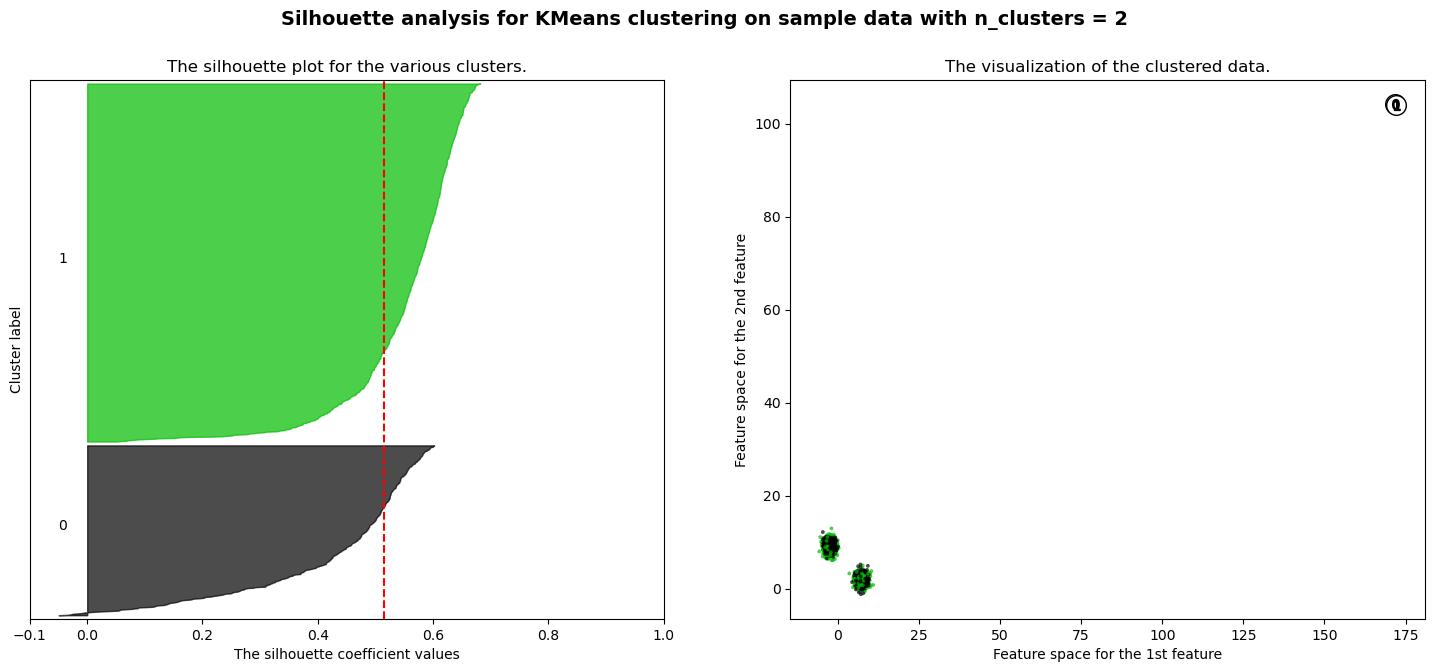

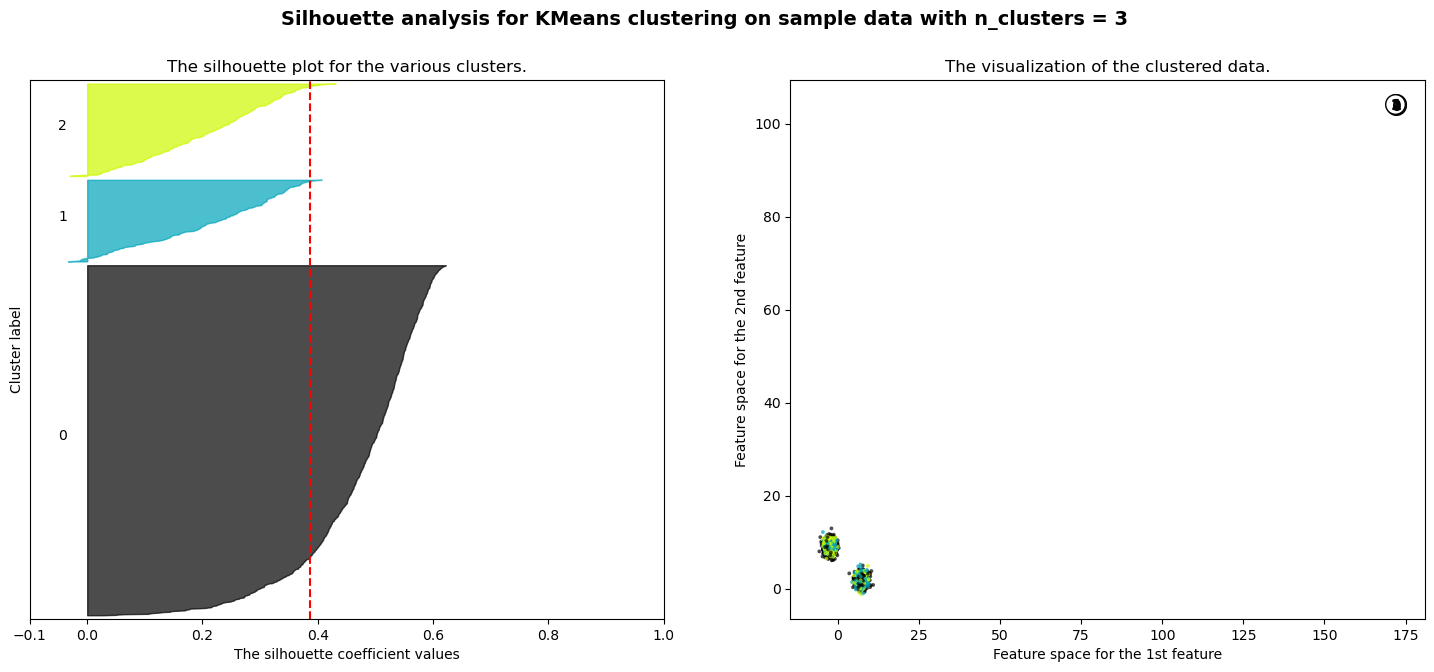

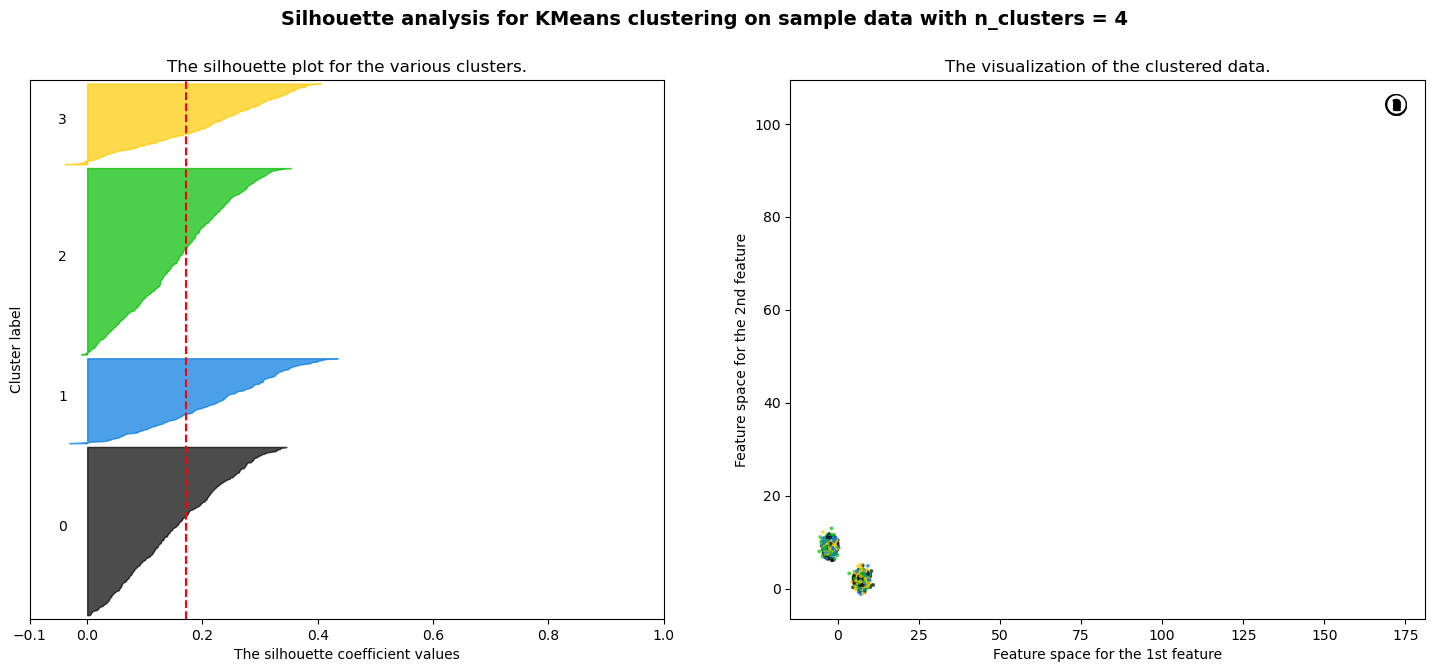

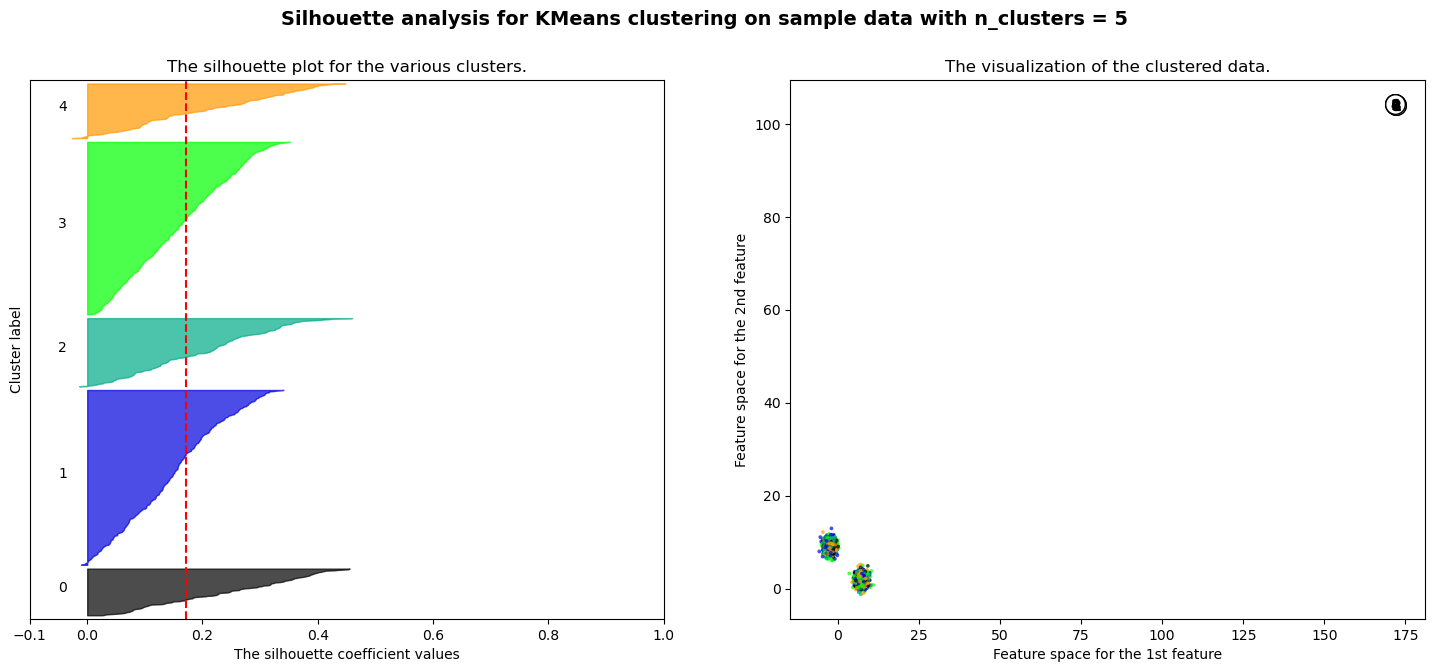

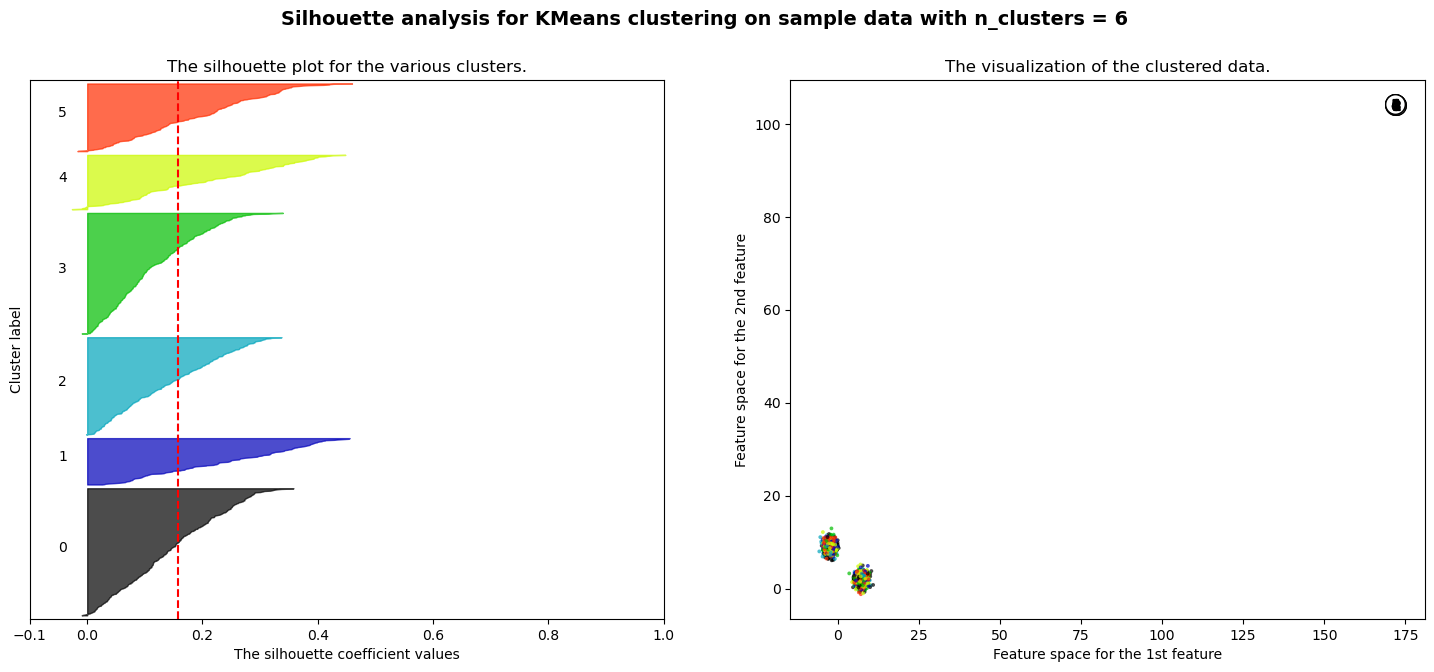

In [79]:


# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
P, q = make_blobs(
    n_samples=1500,
    n_features=7,
    centers=2,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=42,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(V) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=808)
    cluster_labels = clusterer.fit_predict(V)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(V, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(V, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        P[:, 0], P[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [80]:
# An empty list to store inertias: 
intertia_list = [ ]

# Our list of cluster numbers:
k_list = range(1, 10)

# For each number of clusters:
for k in k_list : 
    
    # We instantiate a k-means for k clusters
    kmeans = KMeans(n_clusters=k)
    
    # We train
    kmeans.fit(V)
    
    # We record the inertia obtained: 
    intertia_list.append(kmeans.inertia_)

C:\Users\fullb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\fullb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\fullb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\fullb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

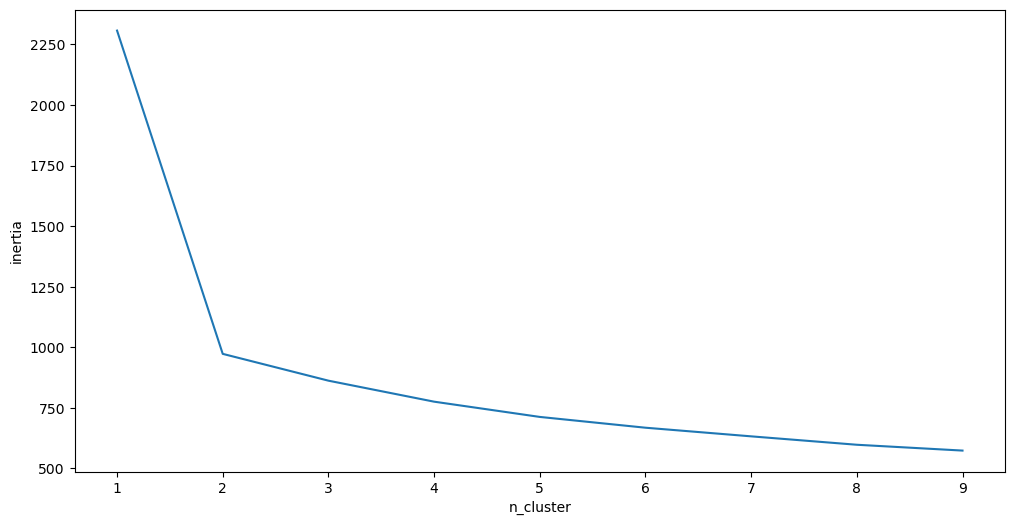

In [81]:
# Elbow method to determine the number of clusters by inertia
# As one might have guessed, we will use 2 clusters (True/False)

fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("inertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [82]:
#We have determined the number of clusters for k-mean
kmeanz = KMeans(n_clusters = 2, random_state=808, n_init="auto")

In [83]:
# Fitting the K-Means model 
kmeanz.fit(V)

C:\Users\fullb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=2, n_init='auto', random_state=808)

In [84]:
# Predicted value
kmeanz.predict(V)

array([1, 1, 1, ..., 0, 0, 0])

In [85]:
# Label kmean
kmeanz.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [86]:
# The centroids of the 2 clusters
print(kmeanz.cluster_centers_)

[[171.89863354 104.19312629 104.14503106   5.23865424   3.3479089
  111.59026915]
 [171.98684366 103.95183874 103.81357915   4.1247296    3.05818092
  113.1953294 ]]


In [87]:
# Averages according to True/False
print(billets_f.groupby('is_genuine').mean())

             diagonal  height_left  height_right  margin_low  margin_up  \
is_genuine                                                                
False       171.90116    104.19034     104.14362     5.21376    3.35016   
True        171.98708    103.94913     103.80865     4.11824    3.05213   

               length  
is_genuine             
False       111.63064  
True        113.20243  


In [88]:
# Relative score
print("score: ",kmeanz.score(V))

score:  -972.1548318009975


In [89]:
V

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...
1303,172.17,104.49,103.76,5.01,2.93,111.21
1315,172.08,104.15,104.17,4.78,3.40,112.29
1347,171.72,104.46,104.12,5.70,3.61,110.31
1435,172.66,104.33,104.41,5.19,3.56,111.47


In [90]:
# Silhouette score for 2 cluster (most optimal)
k_means_labels = kmeanz.labels_
print("silhouette_score: ", silhouette_score(V,k_means_labels ))

silhouette_score:  0.5142147658800645


In [91]:
k_means_labels

array([1, 1, 1, ..., 0, 0, 0])

In [92]:
# Retrieving cluster labels
labelsk = kmeanz.labels_.copy()

In [93]:
labelsk

array([1, 1, 1, ..., 0, 0, 0])

In [94]:
# Predicting clusters for data using K-Means model.
clusters = kmeanz.predict(V)
clusters

array([1, 1, 1, ..., 0, 0, 0])

In [95]:
#Association of clusters by k-mean
dendroto = billets_f.copy()
dendroto['cluster']=clusters
dendroto

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
0,True,171.81,104.86,104.95,4.52,2.89,112.83,1
1,True,171.46,103.36,103.66,3.77,2.99,113.09,1
2,True,172.69,104.48,103.50,4.40,2.94,113.16,1
3,True,171.36,103.91,103.94,3.62,3.01,113.51,1
4,True,171.73,104.28,103.46,4.04,3.48,112.54,1
...,...,...,...,...,...,...,...,...
1303,False,172.17,104.49,103.76,5.01,2.93,111.21,0
1315,False,172.08,104.15,104.17,4.78,3.40,112.29,0
1347,False,171.72,104.46,104.12,5.70,3.61,110.31,0
1435,False,172.66,104.33,104.41,5.19,3.56,111.47,0


In [96]:
# Sum of values by clusters
oade = dendroto.groupby(by=['cluster']).count()
oade

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
cluster,,,,,,,
0,483,483,483,483,483,483,483
1,1017,1017,1017,1017,1017,1017,1017


C:\Users\fullb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\fullb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\fullb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\fullb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

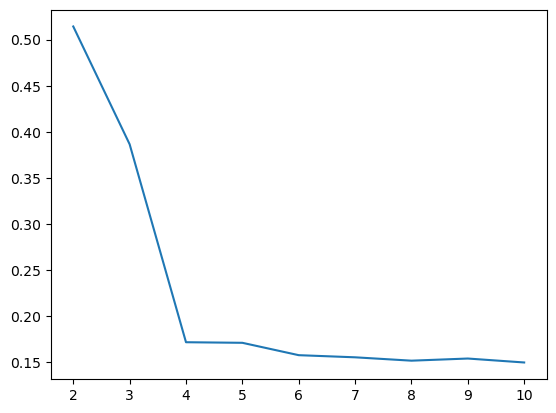

In [97]:
scores = []
for n in range(2, 11, 1):
    kmqsq = KMeans( n_clusters=n, random_state = 808, n_init = 10)
    kmqsq.fit(V)
    labelsqs_ = kmqsq.predict(V)
    scores.append(silhouette_score(V,labelsqs_ ))

plt.plot(range(2, 11, 1), scores)

In [98]:
# In binary
verif_km = dendroto.copy()
verif_km['is_genuine'] = verif_km['is_genuine'].astype('int')
verif_km

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
0,1,171.81,104.86,104.95,4.52,2.89,112.83,1
1,1,171.46,103.36,103.66,3.77,2.99,113.09,1
2,1,172.69,104.48,103.50,4.40,2.94,113.16,1
3,1,171.36,103.91,103.94,3.62,3.01,113.51,1
4,1,171.73,104.28,103.46,4.04,3.48,112.54,1
...,...,...,...,...,...,...,...,...
1303,0,172.17,104.49,103.76,5.01,2.93,111.21,0
1315,0,172.08,104.15,104.17,4.78,3.40,112.29,0
1347,0,171.72,104.46,104.12,5.70,3.61,110.31,0
1435,0,172.66,104.33,104.41,5.19,3.56,111.47,0


In [99]:
musdsi = verif_km[verif_km['is_genuine'] == verif_km['cluster']]
musdsi

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
0,1,171.81,104.86,104.95,4.52,2.89,112.83,1
1,1,171.46,103.36,103.66,3.77,2.99,113.09,1
2,1,172.69,104.48,103.50,4.40,2.94,113.16,1
3,1,171.36,103.91,103.94,3.62,3.01,113.51,1
4,1,171.73,104.28,103.46,4.04,3.48,112.54,1
...,...,...,...,...,...,...,...,...
1303,0,172.17,104.49,103.76,5.01,2.93,111.21,0
1315,0,172.08,104.15,104.17,4.78,3.40,112.29,0
1347,0,171.72,104.46,104.12,5.70,3.61,110.31,0
1435,0,172.66,104.33,104.41,5.19,3.56,111.47,0


In [100]:
# Retrieving cluster labels
labelsk = kmeanz.labels_.copy()

In [101]:
labelsk

array([1, 1, 1, ..., 0, 0, 0])

In [102]:
clusters

array([1, 1, 1, ..., 0, 0, 0])

In [103]:
# Accuracy score and confusion matrix of kmeans // Good performance
print("accuracy_score",accuracy_score(b,labelsk ))
print("confusion_matrix\n",confusion_matrix(b,labelsk ))

accuracy_score 0.986
confusion_matrix
 [[481  19]
 [  2 998]]


In [104]:
print("confusion_matrix\n",confusion_matrix(b,rev_p ))

confusion_matrix
 [[491   9]
 [  4 996]]


Comparing the confusion matrix of the two models we can see quite close results, the main difference being in the number of false positives (10 more with kmean). Kmeans offers fewer false negatives while logistic regression offers fewer false positives.

In [105]:
print(dendroto.cluster.value_counts())

1    1017
0     483
Name: cluster, dtype: int64


In [106]:
#Study of variance
n_components = 2
pca = PCA(n_components=n_components)

In [107]:
len(kmeanz.cluster_centers_)

2

C:\Users\fullb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\fullb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


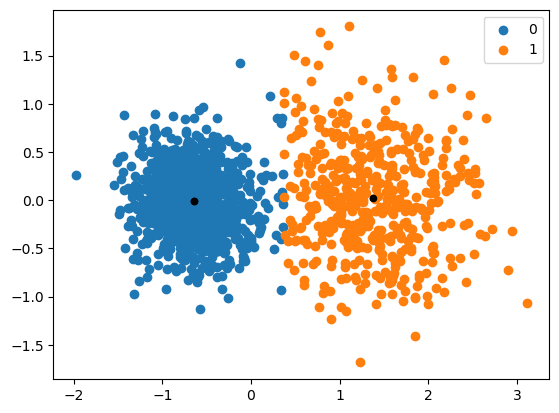

In [108]:
# Scatterplot representation of clusters and their population

#With centroids in black

#Getting unique labels

df_kmean = pca.fit_transform(V)
kmeansp = KMeans(n_clusters= 2)
label_g = kmeansp.fit_predict(df_kmean)
u_labels = np.unique(label_g)
centroids_g = kmeansp.cluster_centers_
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df_kmean[label_g == i , 0] , df_kmean[label_g == i , 1] , label = i)
    plt.scatter(centroids_g[:,0] , centroids_g[:,1] , s = 20, color = "black")
plt.legend()
plt.show()

# Usage prediction function 

In [109]:
data = pd.read_csv('billets_production.csv')

In [110]:
data

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [111]:
bouilli = data.copy()
bouilli = bouilli.iloc[:,:-1]
bouilli

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.76,104.01,103.54,5.21,3.30,111.42
1,171.87,104.17,104.13,6.00,3.31,112.09
2,172.00,104.58,104.29,4.99,3.39,111.57
3,172.49,104.55,104.34,4.44,3.03,113.20
4,171.65,103.63,103.56,3.77,3.16,113.33


In [112]:
X

,diagonal,height_left,height_right,margin_up,length
0,171.81,104.86,104.95,2.89,112.83
1,171.46,103.36,103.66,2.99,113.09
2,172.69,104.48,103.50,2.94,113.16
3,171.36,103.91,103.94,3.01,113.51
4,171.73,104.28,103.46,3.48,112.54
...,...,...,...,...,...
1495,171.75,104.38,104.17,3.09,111.28
1496,172.19,104.63,104.44,3.37,110.97
1497,171.80,104.01,104.12,3.36,111.95
1498,172.06,104.28,104.06,3.46,112.25


## Logistic regression

In [113]:
F = bouilli.copy()

In [114]:
# Logistic prediction function
def logpred(Y):
    determ = []
    y_prevision = modele_logit.predict(Y)
    y_proba = modele_logit.predict_proba(Y)[:,1]
    Y['resultat'] = y_prevision
    Y['proba'] = y_proba
    for i in Y['resultat'] ==1:
        if i is True:
            determ.append('Vrai')
        else:
            determ.append('Faux')
    Y['is_genuine'] = determ
    Y['id']= data['id']
    return(Y)

In [115]:
logpred(F)

C:\Users\fullb\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\fullb\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,diagonal,height_left,height_right,margin_low,margin_up,length,resultat,proba,is_genuine,id
0,171.76,104.01,103.54,5.21,3.30,111.42,0,0.000045,Faux,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,0,0.000004,Faux,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,0,0.000011,Faux,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,1,0.993456,Vrai,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,1,0.999991,Vrai,A_5


## Kmean

In [116]:
Q = bouilli.copy()

In [117]:
# Function for Kmean
def kmeanpred(M):
    determ = []
    y_pred = kmeanz.predict(M)
    M['labels'] = kmeanz.predict(M)
    for i in M['labels'] ==1:
        if i is True:
            determ.append('Vrai')
        else:
            determ.append('Faux')
    M['is_genuine'] = determ
    M['id'] = data['id']
    return(M)

In [118]:
kmeanpred(Q)

,diagonal,height_left,height_right,margin_low,margin_up,length,labels,is_genuine,id
0,171.76,104.01,103.54,5.21,3.30,111.42,0,Faux,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,0,Faux,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,0,Faux,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,1,Vrai,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,1,Vrai,A_5


In [119]:
# Logistic regression slightly more accurate than kmeans
# Both give very good results
# For the situation the results are the same